## SONG SELECTOR 

In [607]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import yellowbrick

In [608]:
# import sys
# sys.path.append('../../')
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import pprint

In [609]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

1- load the pandas data frame songs of the audio features (minimum 1000 songs as diverse as possible))









In [610]:
original_data = pd.read_csv('./df_concat_20905.csv')

In [611]:
original_data.drop_duplicates(inplace=True, ignore_index=False)

In [612]:
original_data.head()

,Unnamed: 0,Unnamed: 0.1,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0,0,0.566,0.664,-5.303,0.0464,0.6340,0.000000,0.116,0.437,128.945,3dYD57lRAUcMHufyqn9GcI,241688
1,1,1,0.768,0.820,-4.630,0.0474,0.1790,0.000000,0.689,0.625,129.965,2V4bv1fNWfTcyRJKmej6Sj,213293
2,2,2,0.558,0.559,-9.222,0.0959,0.3710,0.000007,0.109,0.620,78.558,7KA4W4McWYRpgf0fWsJZWB,180387
3,3,3,0.679,0.715,-6.383,0.0407,0.0755,0.000000,0.271,0.571,127.435,4Ub8UsjWuewQrPhuepfVpd,214148
4,4,4,0.778,0.824,-5.892,0.0707,0.2840,0.000000,0.405,0.758,100.024,3ZFTkvIE7kyPt6Nu3PEa7V,218093


In [613]:
data_num = original_data.drop(['Unnamed: 0','Unnamed: 0.1','id', 'duration_ms'], axis=1)
data_num.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.566,0.664,-5.303,0.0464,0.6340,0.000000,0.116,0.437,128.945
1,0.768,0.820,-4.630,0.0474,0.1790,0.000000,0.689,0.625,129.965
2,0.558,0.559,-9.222,0.0959,0.3710,0.000007,0.109,0.620,78.558
3,0.679,0.715,-6.383,0.0407,0.0755,0.000000,0.271,0.571,127.435
4,0.778,0.824,-5.892,0.0707,0.2840,0.000000,0.405,0.758,100.024


In [614]:
# data_num['loudness'] = (data_num['loudness'] - data_num['loudness'].min())/ (data_num['loudness'].max() - data_num['loudness'].min())

In [615]:
# data_num['tempo'] = (data_num['tempo'] - data_num['tempo'].min())/ (data_num['tempo'].max() - data_num['tempo'].min())

In [616]:
# data_num['duration_ms'] = (data_num['duration_ms'] - data_num['duration_ms'].min())/ (data_num['duration_ms'].max() - data_num['duration_ms'].min())

In [617]:
# data_num.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.566,0.664,-5.303,0.0464,0.634000,0.000000,0.1160,0.437,128.945
1,0.768,0.820,-4.630,0.0474,0.179000,0.000000,0.6890,0.625,129.965
2,0.558,0.559,-9.222,0.0959,0.371000,0.000007,0.1090,0.620,78.558
3,0.679,0.715,-6.383,0.0407,0.075500,0.000000,0.2710,0.571,127.435
4,0.778,0.824,-5.892,0.0707,0.284000,0.000000,0.4050,0.758,100.024
5,0.421,0.873,-4.343,0.0564,0.065400,0.000000,0.1230,0.629,84.786
6,0.497,0.865,-3.190,0.0644,0.030600,0.067900,0.4430,0.595,125.960
7,0.616,0.789,-4.874,0.0377,0.053000,0.000000,0.1420,0.621,83.066
8,0.751,0.783,-3.724,0.0859,0.003790,0.000000,0.0360,0.816,119.975
9,0.706,0.842,-4.628,0.0380,0.047600,0.000000,0.1340,0.818,104.958


2-  standardise the data using standardscaler



In [618]:
scaler = StandardScaler()
scaler.fit(data_num) #fitting the scaler to data. This is where to use pickle to save the MODEL
data_scaled = scaler.transform(data_num) #to transform the existing data into the model above
data_scaled_df = pd.DataFrame(data_scaled, columns = data_num.columns)
# display(data_num.head())
# print()
data_scaled_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.059960,0.009462,0.498624,-0.391846,1.357352,-0.475313,-0.456681,-0.159108,0.249080
1,1.103700,0.669518,0.630590,-0.379358,-0.179911,-0.475313,3.301449,0.608773,0.284726
2,-0.106046,-0.434807,-0.269840,0.226333,0.468780,-0.475287,-0.502592,0.588350,-1.511811
3,0.590998,0.225249,0.286850,-0.463031,-0.529596,-0.475313,0.559916,0.388211,0.196309
4,1.161307,0.686443,0.383129,-0.088376,0.174842,-0.475313,1.438781,1.152007,-0.761632


In [619]:
# plt.hist(data_scaled_df['danceability']) #plot after scaled (look at x axis)

In [620]:
# plt.hist(data_num['danceability']) #plot of original data

In [621]:
# print(scaler)

3- save the scaler for future use for the new user input song. save it using pickle


In [622]:
with open("scaler_spotify.pickle", "wb") as f:
    pickle.dump(scaler,f)

4- choosing the number of clusters k.


* Elbow method

/var/folders/zb/kc1nztnj6rv4tj8x45jd278h0000gn/T/ipykernel_29834/870976905.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(K, inertia, 'bx-', marker = "o")


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

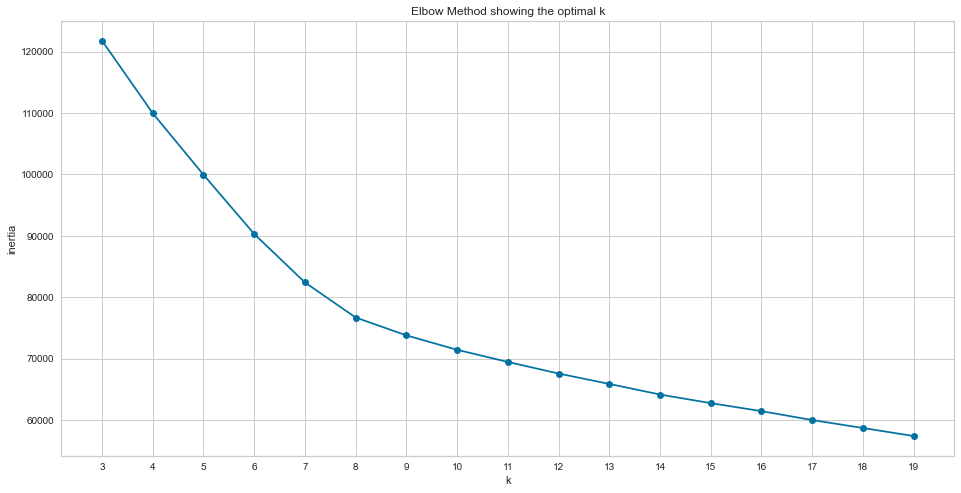

In [623]:
K = range(3, 20)
inertia = []

for k in K:
    # print("Training a K-Means model with {} clusters! ".format(k))
    # print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-', marker = "o")
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

* Silouhette method

/var/folders/zb/kc1nztnj6rv4tj8x45jd278h0000gn/T/ipykernel_29834/375781976.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(K, silhouette, 'bx-', marker = "o")


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

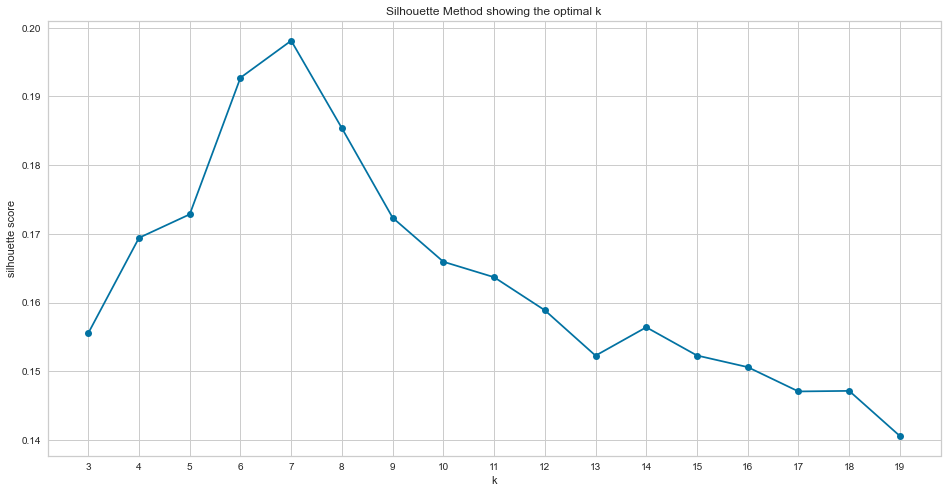

In [624]:
K = range(3, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(data_scaled_df)
    
    # filename = "Model/kmeans_" + str(k) + ".pickle"
    # with open(filename, "wb") as f:
    #     pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(data_scaled_df, kmeans.predict(data_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-', marker = "o")
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

* Yellowbrick check

In [625]:
# from yellowbrick.cluster import SilhouetteVisualizer
# model = KMeans(6, random_state=42)
# visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
# visualizer.fit(data_scaled_df)
# visualizer.show()

In [626]:
# from yellowbrick.cluster import SilhouetteVisualizer
# model = KMeans(9, random_state=42)
# visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
# visualizer.fit(data_scaled_df)
# visualizer.show()

* ==> best fit k = 8

5- fitting  k means cluster.


In [627]:
k_final = 8

In [628]:
kmeans = KMeans(n_clusters=k_final, random_state=1234)
kmeans.fit(data_scaled_df)

KMeans(random_state=1234)

6- build the elbow graph to find the best k.


In [629]:
# as above

7- use the model with the best k to assign every observation in your data frame to its cluster number ( adding cluster columns to the pandas data frame) using model.predict


In [630]:
labels = kmeans.predict(data_scaled_df)

pd.Series(labels).value_counts().sort_index()


0    3016
1    1122
2    4297
3    4954
4    2394
5    1742
6    1238
7    1140
dtype: int64

In [631]:
original_data["cluster"] = labels
original_data.head()

,Unnamed: 0,Unnamed: 0.1,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0,0,0.566,0.664,-5.303,0.0464,0.6340,0.000000,0.116,0.437,128.945,3dYD57lRAUcMHufyqn9GcI,241688,4
1,1,1,0.768,0.820,-4.630,0.0474,0.1790,0.000000,0.689,0.625,129.965,2V4bv1fNWfTcyRJKmej6Sj,213293,7
2,2,2,0.558,0.559,-9.222,0.0959,0.3710,0.000007,0.109,0.620,78.558,7KA4W4McWYRpgf0fWsJZWB,180387,2
3,3,3,0.679,0.715,-6.383,0.0407,0.0755,0.000000,0.271,0.571,127.435,4Ub8UsjWuewQrPhuepfVpd,214148,3
4,4,4,0.778,0.824,-5.892,0.0707,0.2840,0.000000,0.405,0.758,100.024,3ZFTkvIE7kyPt6Nu3PEa7V,218093,3


8-save the model with the best k as your final model  using pickle.


In [632]:
filename = "kmeans_spotify_" + str(k_final) + ".pickle"
with open(filename, "wb") as f:
    pickle.dump(kmeans,f)

## START THE PARTY

for the user input tasks and  the full scenario:

1- get the song name from the user as an input


In [633]:
song_input = input("Please enter your favourite song: ")

In [634]:
artist_input = input("Who is the artist for this song: ")

In [635]:
results = sp.search(q=str(song_input + artist_input),limit=1,market="GB")

In [636]:
track_id = results['tracks']['items'][0]['id']

2- play the input song in music embed player.


In [637]:
from IPython.display import IFrame

IFrame(src="https://open.spotify.com/embed/track/"+track_id+"?utm_source=generator",
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

3- get the audio features for that song from spotify API. using sp.audio_features(trackid) . pay attention to keep  only the audio features columns.


In [638]:
track_features = sp.audio_features(track_id)

In [639]:
df = pd.DataFrame(track_features)
df=df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo"]]
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.758,0.871,-6.408,0.147,0.0062,0,0.0663,0.753,126.994


4- load the stabdardscaler using pickle and use it to scale the new song.


In [640]:
with open("./scaler_spotify.pickle", "rb") as f:
    saved_scaler = pickle.load(f) 

# from pickle import load
# saved_scaler = pickle.load(open("./scaler_spotify.pickle", "rb"))



In [641]:
scaled_user_input = saved_scaler.transform(df)


5- using kmeans_model.predict(new scaled audio record for the new song) to predict the cluster (label) for the new song.


In [642]:
input_label = kmeans.predict(scaled_user_input)

/Users/thaopham/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [643]:
input_label

array([3], dtype=int32)

6- return random song from the same cluster   that the new song belongs to from your data frame and suggest it to the user.


In [644]:
recommended_id = original_data[original_data['cluster'] == int(input_label)].sample()['id']

In [645]:
recommended_id = str(recommended_id.iloc[0])

In [646]:
type(recommended_id)

str

7-  play it using embedded music player

In [647]:
IFrame(src="https://open.spotify.com/embed/track/"+recommended_id+"?utm_source=generator",
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )



In [648]:
def play_song(recommended_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+recommended_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [649]:
def recommend_song(userInputTrackId,saved_scaler,kmeans,original_data):
    ## get the audio features of the userSong
    track_id=sp.audio_features(userInputTrackId)[0]
    ## only filter the features that has been used for clustering
    df = pd.DataFrame(track_features)
    df=df[["danceability","energy","loudness","speechiness","acousticness", "instrumentalness","liveness","valence","tempo"]]

    ##scaling the new song
    scaled_user_input = saved_scaler.transform(df)
    
    ## find the closest cluster to the userSong
    input_label = kmeans.predict(scaled_user_input)[0]
    
    ## return the track id from a random song within the closest cluster
    recommended_id = original_data[original_data['cluster'] == int(input_label)].sample()['id']
    recommended_id = str(recommended_id.iloc[0])

    return recommended_id

In [650]:
# kmeans.cluster_centers_

<AxesSubplot:>

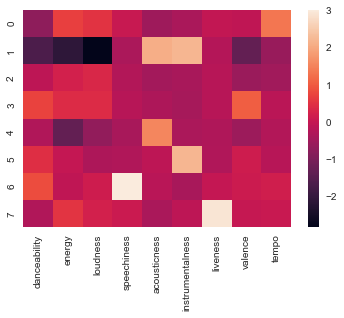

In [651]:
import seaborn as sns

sns.heatmap(pd.DataFrame(kmeans.cluster_centers_, columns=data_num.columns))

### DEMO

In [656]:
##take input from user 
song_input = input("Please enter your favourite song: ")
artist_input = input('Who is the artist for this song:')
print("\n You have chosen: ")
results = sp.search(q=str(song_input + artist_input),limit=1,market="GB")
track_id=results['tracks']['items'][0]['id']
display(play_song(track_id))


recommended_id=recommend_song(track_id,saved_scaler,kmeans,original_data)
print("---------\n The recommended song is:")
display(play_song(recommended_id))

recommended_features = pd.DataFrame(sp.audio_features(recommended_id))
recommended_features = recommended_features[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo"]]



 You have chosen: 


---------
 The recommended song is:


/Users/thaopham/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [653]:
display(df)
display(recommended_features)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.758,0.871,-6.408,0.147,0.0062,0,0.0663,0.753,126.994


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.98,0.535,-16.035,0.058,0.027,0.000002,0.104,0.675,115.744


In [654]:
data_num.describe()
data_num_info = pd.DataFrame(data_num.describe())
data_num_info

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000
mean,0.576408,0.661764,-7.845873,0.077777,0.232250,0.138081,0.185630,0.475954,121.817709
std,0.173595,0.236349,5.099911,0.080076,0.295988,0.290512,0.152473,0.244836,28.615213
min,0.000000,0.000000,-53.436000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.464000,0.525000,-9.358500,0.036000,0.011900,0.000000,0.094000,0.280000,100.005000
50%,0.590000,0.711000,-6.452000,0.048400,0.085600,0.000043,0.123000,0.472000,120.103000
75%,0.704000,0.850000,-4.660000,0.080600,0.356000,0.027250,0.233000,0.667000,139.952000
max,0.980000,1.000000,0.165000,0.957000,0.996000,0.999000,0.992000,0.989000,240.052000


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

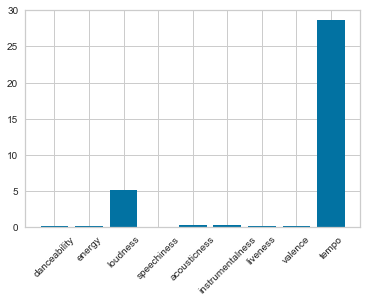

In [655]:
plt.bar(data_num_info.columns,data_num_info.loc['std'])
plt.xticks(rotation=45)